Файл «Данные.xls» содержит выборки из одной и той же базы данных о бывших заключенных.  
Описание переменных:  
- recid – 1, если заключенный – рецидивист, то есть совершил повторное преступление, 0
иначе;
- age – возраст заключенного в месяцах;
- black – 1, если преступник – представитель негроидной расы, 0 иначе;
- married – 1, если преступник женат, 0 иначе;
- alcohol – 1, если у заключенного проблемы с алкоголем, 0 иначе;
- drugs – 1, если у заключенного проблемы с наркотиками, 0 иначе;
- felon – 1 если приговор за тяжкое преступление.
- educ – количество лет школьного образования
- rules – количество нарушений правил в тюрьме

В каждом варианте значение переменная recid известно во всех наблюдениях, кроме
последних 50. Эти наблюдения оставлены для прогноза (будем считать, что это преступники,
еще не совершившие рецидив).  

Для выполнения задания выберите следующие переменные:  
recid – объясняемая переменная.  
age, black, married, felon, educ - регрессоры.

Выполните следующие пункты задания:
1. Оцените три модели, связывающую вероятность повторного преступления с
остальными признаками: 1\) линейную, 2\) логит, 3\) пробит.
2. Дайте словесное описание полученных результатов на примере логит-модели. Какие
из переменных получились значимыми? Выпишите оцененную ковариационную
матрицу оценок коэффициентов.
3. По каждой модели рассчитайте оцените вероятность повторного преступления для всех
наблюдений, включая 50 последних (где неизвестно значение recid). Есть ли заметные
различия между прогнозируемыми вероятностями? В каких наблюдениях возникают
наибольшие расхождения? Кому из ещё не совершивших рецидива бывших
заключенных требуется уделить особое внимание?
4. На примере logit модели проверьте значимость модели в целом тестом отношения
правдоподобия. Рассчитайте p-значение.
5. Этот пункт сделайте для probit модели. Рассмотрим прогнозное правило типа est_low_i = 1,
если est_P(low_i = 1) > c, иначе est_low_i = 0, где c - некое пороговое значение для
моделируемой вероятности. Чувствительностью называется доля верных прогнозов
среди всех наблюдений, где low_i = 1 (способность модели правильно предсказывать
«единички»).  
Специфичностью называется доля верных прогнозов среди всех наблюдений, где
= 0 (способность модели правильно предсказывать «нули»).  
Рассчитайте чувствительность и специфичность для разных пороговых значений c от 0 до 1,
постройте график зависимости чувствительности и специфичности от c.
Требуется, чтобы прогнозная модель имела чувствительность не ниже 70%. Каким
должен быть порог c? Какой специфичности можно добиться в этом случае?

Импортируем нужные библиотеки

In [82]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

Считаем данные

In [2]:
df = pd.read_csv("data.csv", delimiter=";")
df.head()

,recid,black,alcohol,drugs,married,felon,educ,rules,age
0,0.0,0,1,0,1,0,7,2,441
1,0.0,1,0,0,0,1,12,0,307
2,1.0,0,0,1,0,1,9,3,253
3,0.0,0,0,1,0,0,9,0,244
4,0.0,1,0,0,0,0,12,0,277


Выделим регрессоров и объясняемую переменную.  
Не берем последние 50 наблюдений, т. к. для них не указана объясняемая переменная, а соответственно они не пригодятся для построения модели.

In [5]:
X = df[["age", "black", "married", "felon", "educ"]].head(df.shape[0] - 50)
y = df["recid"].head(df.shape[0] - 50)

1\.  
Построим линейную регрессионную модель и выведем общую информацию о ней. Нужно также добавить вектор констант (так как матрица X по умолчанию не имеет первого столбца как вектор единиц) для большей точности.  
Используем коэффициент детерминации `R^2 = RSS/TSS = 1 - ESS/TSS` для оценки модели. Чем больше `R^2`, тем лучше "подходит" модель.  

In [10]:
X = sm.add_constant(X)
linear_model = sm.OLS(y, X).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  recid   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     6.587
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           4.89e-06
Time:                        06:18:57   Log-Likelihood:                -651.04
No. Observations:                 961   AIC:                             1314.
Df Residuals:                     955   BIC:                             1343.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5916      0.088      6.714      0.0

Построим логистическую регрессионную модель. "Математическое" отличие логит-модели от линейной модели, заключается в использовании функции сигмоиды: `p = sig(z)`, где z - линейная комбинация регрессеров + константа 

In [12]:
logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.645288
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  recid   No. Observations:                  961
Model:                          Logit   Df Residuals:                      955
Method:                           MLE   Df Model:                            5
Date:                Wed, 14 Jun 2023   Pseudo R-squ.:                 0.02586
Time:                        06:25:51   Log-Likelihood:                -620.12
converged:                       True   LL-Null:                       -636.59
Covariance Type:            nonrobust   LLR p-value:                 3.886e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4707      0.397      1.185      0.236      -0.308       1.250
age           -0.0020      0.

Построим модель пробит-регрессии. 

In [13]:
probit_model = sm.Probit(y, X).fit()
print(probit_model.summary())

Optimization terminated successfully.
         Current function value: 0.645328
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                  recid   No. Observations:                  961
Model:                         Probit   Df Residuals:                      955
Method:                           MLE   Df Model:                            5
Date:                Wed, 14 Jun 2023   Pseudo R-squ.:                 0.02580
Time:                        06:29:09   Log-Likelihood:                -620.16
converged:                       True   LL-Null:                       -636.59
Covariance Type:            nonrobust   LLR p-value:                 4.026e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2731      0.241      1.132      0.258      -0.200       0.746
age           -0.0012      0.

`R-squared` больше у линейной модели, она лучше "натренирована".

2\.  
Словесное описание модели. Какие из переменных получились значимыми? Оцененная ковариационная матрица оценок коэффициентов?  

Выведем еще раз общую информацию о логит-модели.

In [14]:
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:                  recid   No. Observations:                  961
Model:                          Logit   Df Residuals:                      955
Method:                           MLE   Df Model:                            5
Date:                Wed, 14 Jun 2023   Pseudo R-squ.:                 0.02586
Time:                        06:38:01   Log-Likelihood:                -620.12
converged:                       True   LL-Null:                       -636.59
Covariance Type:            nonrobust   LLR p-value:                 3.886e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4707      0.397      1.185      0.236      -0.308       1.250
age           -0.0020      0.001     -3.158      0.002      -0.003      -0.001
black          0.5073      0.136      3.717      0.0

Значимые переменные: `age`, `black`. 
- Можно посмотреть на `p-value`: если `p-value` < порогового значения (как правило 0.05) -> регрессор значим;
- Можно посмотреть на доверительный интервал: если в доверительный интервал не входит 0 -> регрессор значим. 

Оцененная ковариционная матрица оценок коэффициентов:

In [16]:
logit_model.cov_params()

,const,age,black,married,felon,educ
const,0.157894,-1.696122e-04,-5.116520e-03,0.000660,-0.005954,-0.009444
age,-0.000170,3.822338e-07,6.045136e-07,-0.000020,0.000002,0.000004
black,-0.005117,6.045136e-07,1.863002e-02,0.000230,-0.000706,-0.000442
married,0.000660,-2.036770e-05,2.299291e-04,0.026551,-0.001023,0.000018
felon,-0.005954,1.861207e-06,-7.063036e-04,-0.001023,0.022008,-0.000066
educ,-0.009444,4.472315e-06,-4.423078e-04,0.000018,-0.000066,0.000844


3\.  
По каждой модели рассчитайте оцените вероятность повторного преступления для всех
наблюдений, включая 50 последних (где неизвестно значение recid). Есть ли заметные
различия между прогнозируемыми вероятностями? В каких наблюдениях возникают
наибольшие расхождения? Кому из ещё не совершивших рецидива бывших
заключенных требуется уделить особое внимание?

In [19]:
X_all = df[['age', 'black', 'married', 'felon', 'educ']]
X_all = sm.add_constant(X_all)

Вероятность преступлений для линейной модели:

In [20]:
linear_all_predict = linear_model.predict(X_all)
linear_all_predict

0       0.262240
1       0.443990
2       0.381669
3       0.394762
4       0.465905
          ...   
1006    0.389747
1007    0.375437
1008    0.366695
1009    0.300739
1010    0.401877
Length: 1011, dtype: float64

Вероятность преступления для пробит-модели:

In [21]:
probit_all_predict = probit_model.predict(X_all)
probit_all_predict

0       0.262103
1       0.443409
2       0.379739
3       0.394012
4       0.467929
          ...   
1006    0.388906
1007    0.373465
1008    0.365039
1009    0.298510
1010    0.401396
Length: 1011, dtype: float64

Вероятность преступления для логит-модели:

In [22]:
logit_all_predict = logit_model.predict(X_all)
logit_all_predict

0       0.262578
1       0.443497
2       0.380564
3       0.393921
4       0.467625
          ...   
1006    0.388716
1007    0.372691
1008    0.364254
1009    0.296603
1010    0.401493
Length: 1011, dtype: float64

Значительных различий не замечено. 

Найдем топ-5 наибольших расхождений в наблюдениях.  
Для этого, для каждой пары резльутатов найдем их дельту и отберем топ-5 наблюдений с наибольшой дельтой.

In [32]:
def get_top10_discrepancies(model1, model2):
    delta = np.abs(model1 - model2)
    delta = np.c_[delta, np.arange(len(delta))]
    delta = delta[delta[:, 0].argsort()[::-1]]
    return [(index, d) for index, d in delta[:5]]

In [36]:
print(get_top10_discrepancies(linear_all_predict, probit_all_predict))
print(get_top10_discrepancies(linear_all_predict, logit_all_predict))
print(get_top10_discrepancies(probit_all_predict, logit_all_predict))

[(0.04126180829893927, 730.0), (0.03981784185033854, 87.0), (0.03444953692080771, 863.0), (0.03371322818399318, 758.0), (0.02999813668059806, 904.0)]
[(0.0469980183292695, 730.0), (0.04529416553145932, 87.0), (0.03939547443633809, 863.0), (0.03852785269955657, 758.0), (0.033701899772878186, 904.0)]
[(0.00573621003033023, 730.0), (0.005476323681120776, 87.0), (0.005096047360809541, 366.0), (0.00494593751553038, 863.0), (0.004814624515563387, 758.0)]


Получаем, что наибольшие расхождения находятся в наблюдениях с индексами 730, 87, 863, 366, 758, 904. 

Еще не совершили рецидив преступники, у которых `recid = 0` или 50 последних преступников (у которых пока нет `recid`). С помощью линейной модели найдем всех таких преступников и оценим их вероятность совершения рецидива. Будем считать, что вероятность рецидива высока (а, соответсвенно, ожидается, что он будет совершен), если вероятность будет > 0.5.

In [50]:
suspects = X_all[df["recid"] != 1]
suspects_predict = linear_model.predict(suspects)
suspects_predict = np.c_[suspects_predict, np.arange(len(suspects_predict))]
suspects_predict = suspects_predict[suspects_predict[:, 0].argsort()[::-1]]
suspects_predict = suspects_predict[suspects_predict[:, 0] > 0.5]
print("Потенциальные рецидивисты:")
for p, index in suspects_predict:
    print(f"Индекс преступника: {index} | Вероятность рецидива: {p}")

Потенциальные рецидивисты:
Индекс преступника: 617.0 | Вероятность рецидива: 0.538056492922749
Индекс преступника: 167.0 | Вероятность рецидива: 0.5351157651227392
Индекс преступника: 75.0 | Вероятность рецидива: 0.5254800376121151
Индекс преступника: 59.0 | Вероятность рецидива: 0.5216724380369796
Индекс преступника: 95.0 | Вероятность рецидива: 0.521645774204714
Индекс преступника: 633.0 | Вероятность рецидива: 0.5136209439243383
Индекс преступника: 185.0 | Вероятность рецидива: 0.5106802161243285
Индекс преступника: 429.0 | Вероятность рецидива: 0.5103562946406358
Индекс преступника: 478.0 | Вероятность рецидива: 0.5099361906692058
Индекс преступника: 585.0 | Вероятность рецидива: 0.5095427505300415
Индекс преступника: 284.0 | Вероятность рецидива: 0.5094199042100385
Индекс преступника: 36.0 | Вероятность рецидива: 0.5090959827263458
Индекс преступника: 292.0 | Вероятность рецидива: 0.5090959827263458
Индекс преступника: 106.0 | Вероятность рецидива: 0.5086758787549158
Индекс престу

4\.  
На примере logit модели проверьте значимость модели в целом тестом отношения
правдоподобия. Рассчитайте p-значение.

In [54]:
print(f"p-value: {logit_model.llr_pvalue}")

p-value: 3.885730432085005e-06


p-value < 0.05 -> Модель в целом значима

5\.  
Этот пункт сделайте для probit модели. Рассмотрим прогнозное правило типа est_low_i = 1,
если est_P(low_i = 1) > c, иначе est_low_i = 0, где c - некое пороговое значение для
моделируемой вероятности. Чувствительностью называется доля верных прогнозов
среди всех наблюдений, где low_i = 1 (способность модели правильно предсказывать
«единички»).  
Специфичностью называется доля верных прогнозов среди всех наблюдений, где
= 0 (способность модели правильно предсказывать «нули»).  
Рассчитайте чувствительность и специфичность для разных пороговых значений c от 0 до 1,
постройте график зависимости чувствительности и специфичности от c.
Требуется, чтобы прогнозная модель имела чувствительность не ниже 70%. Каким
должен быть порог c? Какой специфичности можно добиться в этом случае?

Для нахождения чувствительности и специфичности будем пользоваться матрицей ошибок.  
Чувтсвительность = `TP / (TP + FN)`, где TP - число истино-положительных срабатываний, FN - число ложно-отрицательных срабатываний.  
Специфичность = `TN / (TN + FP)`, где TN - число истино-отрицательных срабатываний, FP - число ложно-положительных срабатываний.  

In [80]:
predict_true = df["recid"].head(X_all.shape[0] - 50)
probit_predict = probit_model.predict(X)

In [77]:
def specificity(c: float) -> float:
    class_predict = np.zeros(probit_predict.shape)
    class_predict[probit_predict > c] = 1
    cm = confusion_matrix(predict_true, class_predict)
    return cm[1, 1] / (cm[1, 0] + cm[1, 1])

In [78]:
def sensitivity(c: float) -> float:
    class_predict = np.zeros(probit_predict.shape)
    class_predict[probit_predict > c] = 1
    cm = confusion_matrix(predict_true, class_predict)
    return cm[0, 0] / (cm[0, 0] + cm[0, 1])

Значения чувствительности и специфичности для разных `c`:

In [87]:
c = 0
while c <= 1.0:
    print(f"c: {c} | чувствительность: {sensitivity(c)} | специфичность: {specificity(c)}")
    c += 0.1

c: 0 | чувствительность: 0.0 | специфичность: 1.0
c: 0.1 | чувствительность: 0.0 | специфичность: 1.0
c: 0.2 | чувствительность: 0.025041736227045076 | специфичность: 0.9861878453038674
c: 0.30000000000000004 | чувствительность: 0.25542570951585974 | специфичность: 0.8591160220994475
c: 0.4 | чувствительность: 0.676126878130217 | специфичность: 0.47790055248618785
c: 0.5 | чувствительность: 0.9315525876460768 | специфичность: 0.12154696132596685
c: 0.6 | чувствительность: 1.0 | специфичность: 0.0
c: 0.7 | чувствительность: 1.0 | специфичность: 0.0
c: 0.7999999999999999 | чувствительность: 1.0 | специфичность: 0.0
c: 0.8999999999999999 | чувствительность: 1.0 | специфичность: 0.0
c: 0.9999999999999999 | чувствительность: 1.0 | специфичность: 0.0


Построим график зависимости чувствительности и специфичности от `c`. 

In [90]:
C = [c for c in np.linspace(0, 1, 1000)]
sens = [sensitivity(c) for c in C]
spec = [specificity(c) for c in C]

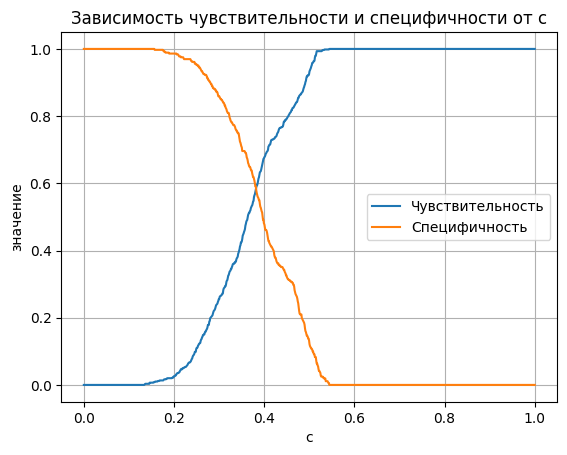

In [92]:
plt.plot(C, sens, label="Чувствительность")
plt.plot(C, spec, label="Специфичность")

plt.grid()
plt.legend()
plt.title("Зависимость чувствительности и специфичности от c")
plt.xlabel("c")
plt.ylabel("значение")

plt.show()

По графику видно, что для чувствительности в 70% нужно иметь с равным ~ 0.41.
В этом случае можно будет добится специфичности ~ 43%